In [1]:
# FOR 2021 ANALYSIS USE THIS BLOCK

# Modules/Packages
import sys
print("System ", sys.version,"\n")
import pandas as pd
print("Pandas ", pd.__version__)
import numpy as np
print("Numpy ", np.__version__)
##import pyarrow as pyro
#print("Pyarrow ", pyro.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Seaborn ", sns.__version__)
from datetime import datetime
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.options.display.float_format = '{:,.2f}'.format

# Datasets
airlines = pd.read_csv("Airlines.csv")

#flights_2018 = pd.read_csv('Combined_Flights_2018.csv', parse_dates=['FlightDate'])
#flights_2019 = pd.read_csv('Combined_Flights_2019.csv', parse_dates=['FlightDate'])
#flights_2020 = pd.read_csv('Combined_Flights_2020.csv', parse_dates=['FlightDate'])
flights_2021 = pd.read_csv('Combined_Flights_2021.csv', parse_dates=['FlightDate'])
#flights_2022 = pd.read_csv('Combined_Flights_2022.csv', parse_dates=['FlightDate'])

# Use the df to join multiple years
combined_flights = pd.concat([flights_2019,flights_2020,flights_2021])
#df = pd.concat([flights_2020, flights_2021, flights_2022])

# Merge with airline dataset in order to get the major airline
#combined_flights = pd.merge(combined_flights, airlines, left_on='Marketing_Airline_Network', right_on='Code')

#combined_flights['flight_count']=1


combined_flights.head(5)

System  3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0] 

Pandas  1.4.2
Numpy  1.21.5
Seaborn  0.11.2


: 

: 

In [1]:
''' ###USE THIS BLOCK INSTEAD FOR ANY 2019-2021 GRAPHS!!! 


# Modules/Packages
# SHORT COLUMN VERSION

# Modules/Packages
import sys
print("System ", sys.version,"\n")
import pandas as pd
print("Pandas ", pd.__version__)
import numpy as np
print("Numpy ", np.__version__)
##import pyarrow as pyro
#print("Pyarrow ", pyro.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Seaborn ", sns.__version__)
from datetime import datetime
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.options.display.float_format = '{:,.2f}'.format

# Datasets
airlines = pd.read_csv("Airlines.csv")

short_columns = ['FlightDate','Airline','Origin','Dest','Cancelled','Diverted','DepDelay','DepDel15','Marketing_Airline_Network','Year','Month']

#flights_2018 = pd.read_csv('Combined_Flights_2018.csv', parse_dates=['FlightDate'], usecols=short_columns)
flights_2019 = pd.read_csv('Combined_Flights_2019.csv', parse_dates=['FlightDate'], usecols=short_columns)
flights_2020 = pd.read_csv('Combined_Flights_2020.csv', parse_dates=['FlightDate'], usecols=short_columns)
flights_2021 = pd.read_csv('Combined_Flights_2021.csv', parse_dates=['FlightDate'], usecols=short_columns)
#flights_2022 = pd.read_csv('Combined_Flights_2022.csv', parse_dates=['FlightDate'], usecols=short_columns)

# Use the df to join multiple years
combined_flights = pd.concat([
    #flights_2018,
    flights_2019,flights_2020,flights_2021
    #,flights_2022
    ])
#df = pd.concat([flights_2020, flights_2021, flights_2022])

# Merge with airline dataset in order to get the major airline
combined_flights = pd.merge(combined_flights, airlines, left_on='Marketing_Airline_Network', right_on='Code')
combined_flights = combined_flights.rename(columns={'Description':'MajorAirline'})
combined_flights['flight_count']=1

combined_flights['flight_count']=1

combined_flights.head(5)


'''

System  3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0] 

Pandas  1.4.2
Numpy  1.21.5
Seaborn  0.11.2


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,DepDelay,Year,Month,Marketing_Airline_Network,DepDel15,Code,MajorAirline,flight_count
0,2019-04-01,Envoy Air,LIT,ORD,False,False,-3.00,2019,4,AA,0.00,AA,American Airlines Inc.,1
1,2019-04-02,Envoy Air,LIT,ORD,False,False,-12.00,2019,4,AA,0.00,AA,American Airlines Inc.,1
2,2019-04-03,Envoy Air,LIT,ORD,False,False,-9.00,2019,4,AA,0.00,AA,American Airlines Inc.,1
3,2019-04-04,Envoy Air,LIT,ORD,False,False,143.00,2019,4,AA,1.00,AA,American Airlines Inc.,1
4,2019-04-05,Envoy Air,LIT,ORD,False,False,4.00,2019,4,AA,0.00,AA,American Airlines Inc.,1


In [112]:
# TRENDS - SMOOTHED TO MONTH LEVEL

trend_flights = pd.DataFrame(combined_flights.groupby([combined_flights['FlightDate'].dt.to_period('m'),'MajorAirline'])['DepDel15'].agg('mean')).reset_index()
#trend_flights["FlightDate"] = pd.to_timestamp(trend_flights["FlightDate"], format='%Y-%m')
trend_flights['FlightDate'] = trend_flights['FlightDate'].dt.strftime('%Y-%m-01 00:00:00.000')
trend_flights_legacy = trend_flights[(trend_flights['MajorAirline']=='American Airlines Inc.') | (trend_flights['MajorAirline']=='Delta Air Lines Inc.') | (trend_flights['MajorAirline']=='United Air Lines Inc.')]
#origin_date = combined_weather.groupby(['FlightDate','Origin'])
#combined_flights.head()

dates = [x for x in trend_flights_legacy['FlightDate']]


In [36]:
plot_dates = []
def trim_dates():
    for x in trend_flights_legacy['FlightDate']:
        if x not in plot_dates:
            plot_dates.append(x)

trim_dates()

plot_dates = {'FlightDate': plot_dates}
plot_dates = pd.DataFrame(plot_dates)

plot_dates = {'FlightDate': plot_dates}
plot_dates = pd.DataFrame(plot_dates)

    

In [110]:
# SETTING UP LABELS FOR NEXT GRAPH

plot_dates = []
def trim_dates():
    for x in trend_flights_legacy['FlightDate']:
        if x not in plot_dates:
            plot_dates.append(x)

trim_dates()

plot_dates = {'FlightDate': plot_dates}
plot_dates = pd.DataFrame(plot_dates)

plot_dates['FlightDate'] = pd.to_datetime(plot_dates.FlightDate, format='%Y-%m-%d %H:%M:%S')


plot_dates['M'] = plot_dates['FlightDate'].dt.strftime("%b")
plot_dates['Y'] = plot_dates['FlightDate'].dt.strftime("%Y")
plot_dates['MY'] = plot_dates['M'] + ' ' + plot_dates['Y']

quarterly_dates = ['Jan 2019', 'Apr 2019', 'Jul 2019','Oct 2019'
                ,'Jan 2020', 'Apr 2020', 'Jul 2020','Oct 2020'
                ,'Jan 2021', 'Apr 2021', 'Jul 2021','Oct 2021']

plot_dates.loc[plot_dates['MY'].isin(quarterly_dates),'MY_quarter'] = plot_dates['MY']

plot_dates.loc[plot_dates['MY_quarter'].isnull(), 'MY_quarter'] = ' '



/tmp/ipykernel_875/4193275749.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(plot_dates.MY_quarter, rotation = 45, ha = "right")


Text(0.5, 0, 'Flight Month')

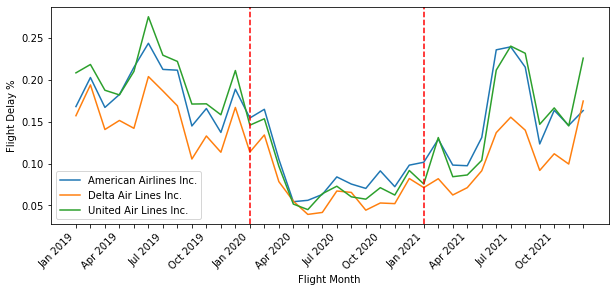

In [114]:
# TRENDS LINE CHART

fig, ax = plt.subplots(figsize=(10, 4))

sns.lineplot(data=trend_flights_legacy, x='FlightDate', y='DepDel15', hue='MajorAirline')

#ax.set_xticklabels(trend_flights_legacy['FlightDate'].strftime("%b"), rotation = 45)
ax.set_xticklabels(plot_dates.MY_quarter, rotation = 45, ha = "right")
plt.ylim = ([0,.3])
ax.get_legend().set_title('')

ax.axvline('2020-01-01 00:00:00.000', color='r', linestyle='--', label='Jan 2021')
ax.axvline('2021-01-01 00:00:00.000', color='r', linestyle='--', label='Dec 2021')

ax.set_ylabel(f'Flight Delay %')
ax.set_xlabel(f'Flight Month')

In [97]:
# TRENDS - SMOOTHED TO MONTH LEVEL

trend_flights = pd.DataFrame(combined_flights.groupby([combined_flights['FlightDate'].dt.to_period('m'),'MajorAirline'])['flight_count'].agg('sum')).reset_index()
#trend_flights["FlightDate"] = pd.to_timestamp(trend_flights["FlightDate"], format='%Y-%m')
trend_flights['FlightDate'] = trend_flights['FlightDate'].dt.strftime('%Y-%m-01 00:00:00.000')
trend_flights_legacy = trend_flights[(trend_flights['MajorAirline']=='American Airlines Inc.') | (trend_flights['MajorAirline']=='Delta Air Lines Inc.') | (trend_flights['MajorAirline']=='United Air Lines Inc.')]
#origin_date = combined_weather.groupby(['FlightDate','Origin'])
#combined_flights.head()

dates = [x for x in trend_flights_legacy['FlightDate']]



/tmp/ipykernel_875/1396725586.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(plot_dates.MY_quarter, rotation = 45, ha = "right")


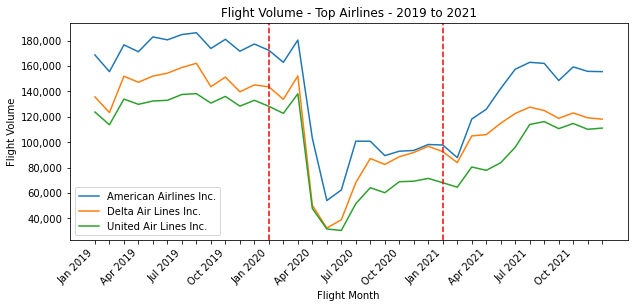

In [106]:
# TRENDS LINE CHART

import matplotlib.ticker as mtick


fig, ax = plt.subplots(figsize=(10, 4))

sns.lineplot(data=trend_flights_legacy, x='FlightDate', y='flight_count', hue='MajorAirline')

#ax.set_xticklabels(trend_flights_legacy['FlightDate'].strftime("%b"), rotation = 45)
ax.set_xticklabels(plot_dates.MY_quarter, rotation = 45, ha = "right")
#plt.ylim = ([0,.3])

ax.axvline('2020-01-01 00:00:00.000', color='r', linestyle='--', label='Jan 2021')
ax.axvline('2021-01-01 00:00:00.000', color='r', linestyle='--', label='Dec 2021')

y_range = range(20000, 180000, 40000)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax.set_title('Flight Volume - Top Airlines - 2019 to 2021')
ax.set_ylabel(f'Flight Volume')
ax.set_xlabel(f'Flight Month')
ax.get_legend().set_title('')


# WEATHER STARTS HERE

In [116]:
### READ WEATHER DATA

atl = pd.read_csv('Atlanta 21.csv', index_col= 'DATE')
lax = pd.read_csv('Los Angeles 21.csv', index_col= 'DATE')
ord = pd.read_csv('Chicago 21.csv', index_col= 'DATE')
dfw = pd.read_csv('DFW 21.csv', index_col= 'DATE')
den = pd.read_csv('Denver 21.csv', index_col= 'DATE')
nyc = pd.read_csv('NY JFK 21.csv', index_col= 'DATE')
sfo = pd.read_csv('SFO 21.csv', index_col= 'DATE')
sea = pd.read_csv('Seattle 21.csv', index_col= 'DATE')
mco = pd.read_csv('Orlando 21.csv', index_col= 'DATE')
las = pd.read_csv('LV 21.csv', index_col= 'DATE')
clt = pd.read_csv('Charlotte 21.csv', index_col= 'DATE')
iah = pd.read_csv('Houston 21.csv', index_col= 'DATE')
phx = pd.read_csv('Phoenix 21.csv', index_col= 'DATE')



atl['airport'] = 'ATL'
lax['airport'] = 'LAX'
ord['airport'] = 'ORD'
dfw['airport'] = 'DFW'
den['airport'] = 'DEN'
nyc['airport'] = 'JFK'
sfo['airport'] = 'SFO'
sea['airport'] = 'SEA'
mco['airport'] = 'MCO'
las['airport'] = 'LAS'
clt['airport'] = 'CLT'
iah['airport'] = 'IAH'
phx['airport'] = 'PHX'


top_10_aports = [atl, lax, ord, dfw, den, sea, las, clt, iah, phx]
aports = [atl, lax, ord, dfw, den, nyc, sfo, sea, mco, las, clt, iah, phx]
aports1 = {'atl':'Atlanta', 'lax':'Los Angeles', 'ord':'Orlando',
           'dfw':'Dallas Fort-Worth', 'den':'Denver', 'nyc':'New York JFK',
           'sfo': 'San Francisco', 'sea': 'Seattle',
           'mco':'Orlando', 'las':'Las Vegas',
           'clt': 'Charlotte', 'iah': 'Houston',
           'phx': 'Phoenix'}
aports_names = ['Atlanta', 'Los Angeles','Chicago',
           'Dallas Fort-Worth','Denver','New York JFK',
           'San Francisco','Seattle',
           'Orlando', 'Las Vegas', 'Charlotte',
           'Houston','Phoenix']


# combine airports
weather_agg = pd.concat(top_10_aports,axis = 0)

# Only keep rows that do 24-hr summary
weather_agg = weather_agg.loc[weather_agg['REPORT_TYPE'].str[0:3]=='SOD']

# Keep columns that aggregate data to the daily level
weather_agg = weather_agg.iloc[:, list(range(0,7)) + list(range(25,45)) + [-1]]


/tmp/ipykernel_875/4223819385.py:3: DtypeWarning: Columns (8,17,18,42,64,65,78) have mixed types. Specify dtype option on import or set low_memory=False.
  atl = pd.read_csv('Atlanta 21.csv', index_col= 'DATE')
/tmp/ipykernel_875/4223819385.py:4: DtypeWarning: Columns (10,18) have mixed types. Specify dtype option on import or set low_memory=False.
  lax = pd.read_csv('Los Angeles 21.csv', index_col= 'DATE')
/tmp/ipykernel_875/4223819385.py:5: DtypeWarning: Columns (8,10,17,64) have mixed types. Specify dtype option on import or set low_memory=False.
  ord = pd.read_csv('Chicago 21.csv', index_col= 'DATE')
/tmp/ipykernel_875/4223819385.py:6: DtypeWarning: Columns (8,9,17,18,41) have mixed types. Specify dtype option on import or set low_memory=False.
  dfw = pd.read_csv('DFW 21.csv', index_col= 'DATE')
/tmp/ipykernel_875/4223819385.py:7: DtypeWarning: Columns (17,19,41) have mixed types. Specify dtype option on import or set low_memory=False.
  den = pd.read_csv('Denver 21.csv', index_

In [122]:
# Summarized weather TEXT
def weather_code(df,code,new_column_name):
    if df['DailyWeather'].str.contains(code):
        df[new_column_name] = 1

# rain
condition = (weather_agg['DailyWeather'].str.contains('RA'))
weather_agg['rain_flag'] = condition.fillna(False)

# freezin precip
condition = (weather_agg['DailyWeather'].str.contains('FZ'))
weather_agg['freeze_flag'] = condition.fillna(False)

# thunderstorms
condition = (weather_agg['DailyWeather'].str.contains('TS'))
weather_agg['t_storm_flag'] = condition.fillna(False)

# fog
condition = (weather_agg['DailyWeather'].str.contains('FG'))
weather_agg['fog_flag'] = condition.fillna(False)

# snow
condition = (weather_agg['DailyWeather'].str.contains('SN'))
weather_agg['snow_flag'] = condition.fillna(False)



In [126]:
weather_airport = weather_agg.groupby('airport')
wx_stats = weather_airport[['rain_flag','t_storm_flag','snow_flag','freeze_flag','fog_flag']].agg('mean')

#transporse airports and weather statuses
wx_stats = wx_stats.transpose()

column_order = ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'SEA', 'PHX', 'IAH', 'LAS']
wx_stats = wx_stats.reindex(column_order, axis=1)


#set gradients
wx_stats.style.background_gradient(cmap='Reds', axis = 'columns').format('{:,.2f}')


airport,ATL,ORD,DFW,DEN,CLT,LAX,SEA,PHX,IAH,LAS
rain_flag,0.37,0.34,0.27,0.18,0.35,0.10,0.44,0.13,0.39,0.11
t_storm_flag,0.15,0.11,0.16,0.10,0.13,0.01,0.02,0.07,0.21,0.05
snow_flag,0.00,0.13,0.01,0.13,0.01,0.00,0.03,0.00,0.01,0.00
freeze_flag,0.00,0.02,0.01,0.05,0.00,0.00,0.01,0.00,0.01,0.00
fog_flag,0.06,0.04,0.04,0.08,0.07,0.11,0.03,0.01,0.16,0.00


# MERGE FLIGHT AND WEATHER

In [127]:
# CLEAN UP DATES ON AIRLINE AND WEATHER TO PREPARE A SUCCESFUL JOIN
combined_flights['FlightDate']=combined_flights['FlightDate'].astype('datetime64')

weather_agg = weather_agg.reset_index()
weather_agg['DATE'] = pd.to_datetime(weather_agg['DATE']).dt.date
weather_agg['DATE']=weather_agg['DATE'].astype('datetime64')



In [128]:
combined_weather = pd.merge(combined_flights, weather_agg, left_on=['FlightDate','Origin'], right_on=['DATE','airport'])

In [132]:
#SET WEATHER DATA TO NUMERIC

#combined_weather.iloc[:, list(range(80,92))].dtypes

combined_weather['DailyMinimumDryBulbTemperature'] = combined_weather['DailyMinimumDryBulbTemperature'].replace('s','',regex=True).astype('float64')
combined_weather['DailySustainedWindSpeed'] = combined_weather['DailySustainedWindSpeed'].replace('s',0,regex=True).replace('T',0,regex=True).replace('\*',0,regex=True).astype('float64')
combined_weather['DailyPrecipitation'] = combined_weather['DailyPrecipitation'].replace('s',0,regex=True).replace('T',0,regex=True).replace('T',0).astype('float64')
combined_weather['DailySnowfall'] = combined_weather['DailySnowfall'].replace('T',0).astype('float64')


#len(jan_2021_test.columns)

In [133]:
# SNOW SPECIFIC DATA

snow_delay = combined_weather[combined_weather['DailySnowfall']>0]


In [142]:
x= combined_weather.groupby(['Origin','t_storm_flag'])['DepDel15'].agg('mean').unstack().transpose()
x = pd.DataFrame(x).reset_index()
#combined_weather.groupby(['Origin','freeze_flag'])['DepDel15'].agg('mean').unstack()
#combined_weather.groupby(['Origin','snow_flag'])['DepDel15'].agg('mean').unstack()
#combined_weather.groupby(['Origin','rain_flag'])['DepDel15'].agg('mean').unstack()
column_order = ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'SEA', 'PHX', 'IAH', 'LAS']
x = x.reindex(column_order, axis=1)
x = x.rename(index={0: 'no t-storms', 1: 't-storms'})
x = x.reindex(['t-storms', 'no t-storms'])

#set gradients
print('Flight Delay % on days with Thunderstorms vs Without')

x.style.background_gradient(cmap='Blues').format('{:,.2f}')


Flight Delay % on days with Thunderstorms vs Without


Origin,ATL,ORD,DFW,DEN,CLT,LAX,SEA,PHX,IAH,LAS
t-storms,0.25,0.34,0.35,0.42,0.27,0.23,0.17,0.31,0.31,0.37
no t-storms,0.12,0.15,0.19,0.22,0.11,0.17,0.14,0.19,0.14,0.23


In [143]:
#overall series
origin_date = combined_weather.groupby(['FlightDate','Origin'])
origin_date.head()
origin_date[['DepDel15','DepDelay','DailyPrecipitation','DailySnowfall','DailySustainedWindSpeed','DailyMaximumDryBulbTemperature']].agg(['mean'])

weather_delay = origin_date[['DepDel15','DepDelay','DailyPrecipitation','DailySnowfall','DailySustainedWindSpeed','DailyMaximumDryBulbTemperature']].agg(['mean'])

#snow series
origin_snow = snow_delay.groupby(['FlightDate','Origin'])
origin_snow.head()
origin_snow[['DepDel15','DepDelay','DailyPrecipitation','DailySnowfall','DailySustainedWindSpeed','DailyMaximumDryBulbTemperature']].agg(['mean'])

weather_snow = origin_snow[['Cancelled','DepDel15','DepDelay','DailyPrecipitation','DailySnowfall','DailySustainedWindSpeed','DailyMaximumDryBulbTemperature']].agg(['mean'])



Text(0.5, 1.0, 'Percent of Flights Delayed by Snowfall (inches)')

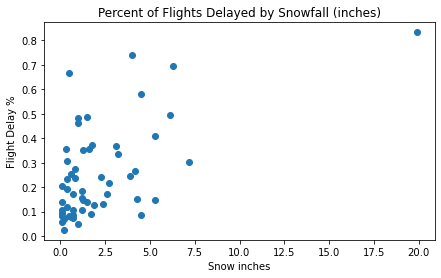

In [146]:
## SNOW DELAYS

fig = plt.figure(figsize = (7,4))
ax1 = fig.add_subplot(1,1,1)

ax1.set_ylabel(f'Flight Delay %')
ax1.set_xlabel(f'Snow inches')

type(weather_delay)
weather_delay.columns
#snow_flag = weather_delay[weather_delay['DailySnowfall']>0]
ax1.scatter(weather_snow['DailySnowfall'],weather_snow['DepDel15'],cmap = 'Blues')
ax1.set_title('Percent of Flights Delayed by Snowfall (inches)')

Text(0.5, 1.0, 'Percent of Flights Cancelled by Snowfall (inches)')

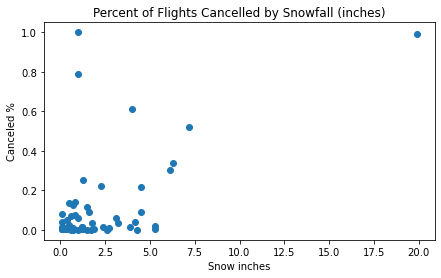

In [147]:
## SNOW CANCELS

fig = plt.figure(figsize = (7,4))
ax1 = fig.add_subplot(1,1,1)

ax1.set_ylabel(f'Canceled %')
ax1.set_xlabel(f'Snow inches')

type(weather_delay)
weather_delay.columns
#snow_flag = weather_delay[weather_delay['DailySnowfall']>0]
ax1.scatter(weather_snow['DailySnowfall'],weather_snow['Cancelled'], cmap = 'Blues')
ax1.set_title('Percent of Flights Cancelled by Snowfall (inches)')

In [80]:
weather_delay = origin_date[['DepDel15','DepDelay','DailyPrecipitation','DailySnowfall','DailySustainedWindSpeed','DailyMaximumDryBulbTemperature']].agg(['mean'])


# AIRPORT & MAPS

In [125]:
# import csv file that has latitude & longitude for every US airport
# lat and long is necessary to create the maps
airports = pd.read_csv('airports.csv')
airports.columns = [x.lower() for x in airports.columns]

airports.head()

Index(['iata', 'airport', 'city', 'state', 'country', 'latitude', 'longitude'], dtype='object')

In [129]:
# aggregate flight data from original dataset
airport_flights = combined_flights.groupby('Origin')['flight_count'].agg('sum')
airport_flights.sort_values(ascending = False).head()

Origin
ATL    313287
ORD    285607
DFW    280418
DEN    268140
CLT    226221
Name: flight_count, dtype: int64

In [130]:
# merge airport dataset (with lat/lon) & original data set (w/flight info)
airports = airports.merge(airport_flights, how = 'left', left_on='iata', right_on = 'Origin')
airports = airports[airports['flight_count'].notnull()]

#len(airports)
airports.head()

,iata,airport,city,state,country,latitude,longitude,flight_count
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.04,-106.61,"17,891.00"
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.17,-150.00,"19,333.00"
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.64,-84.43,"313,287.00"
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.19,-97.67,"61,530.00"
4,BDL,Bradley International,Windsor Locks,CT,USA,41.94,-72.68,"20,586.00"


In [131]:
# turn to int for plotting
airports['flight_count']=airports['flight_count'].astype('int')
airports.head()

,iata,airport,city,state,country,latitude,longitude,flight_count
0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.04,-106.61,17891
1,ANC,Ted Stevens Anchorage International,Anchorage,AK,USA,61.17,-150.00,19333
2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.64,-84.43,313287
3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.19,-97.67,61530
4,BDL,Bradley International,Windsor Locks,CT,USA,41.94,-72.68,20586


In [132]:
## OPTIONAL - to change size of bubble
def multiply_flights(data_f):
    l = []
    for i in data_f.flight_count:
        j = i ** 1.3
        l.append(j)
    return l #i ** 1.6

airports['flight_count_mod'] = multiply_flights(airports)



In [203]:
# modules for mapping
import plotly.express as px
import geopandas as gpd


#Labels only for top 10
airports.loc[airports['iata'].isin(column_order),'top10'] = airports['iata']

#Map criteria
fig = px.scatter_geo(airports,
                    lat=airports.latitude,
                    lon=airports.longitude,
                    hover_name="latitude",
                    size = "flight_count",
                    text = "top10",
                    #title = "US Airports by Flight Volume (top 10 labeled)",
                    #color='Blue'
                    )
fig.update_traces(textposition='top center')

fig.update_layout(
    title={
        'text': "US Airports by 2021 Flight Volume (bubble size) - Top 10 Labeled",
        'y':0.91,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
        )

# ONCE THE MAP SHOWS, ZOOM IN TO THE US
fig.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scattergeo(
        lon = airports['longitude'],
        lat = airports['latitude'],
        text = airports['airport'],
        mode = 'markers',
        hoverinfo = 'text'#airports['airport']
        #size = airports['latitude']
        #marker_color = airports['country']
        ))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo_scope='usa',
    )
fig.show()